In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data
---
---

In [3]:
from google.colab import files
Ufiles=files.upload()

Saving daftar_prodi.csv to daftar_prodi.csv


In [4]:
prodi_data = pd.read_csv(r'daftar_prodi.csv')

In [5]:
prodi_data.head()

,kode_univ,kode_prodi,nama_prodi,jenjang,daya_tampung_2023,peminat_2018,peminat_2019,peminat_2020,peminat_2021,peminat_2022,daya_tampung_2018,daya_tampung_2019,daya_tampung_2020,daya_tampung_2021,daya_tampung_2022
0,111,111001,PENDIDIKAN DOKTER HEWAN,Sarjana,50,633,338,413,391,389,66,66,55,55,55
1,111,111002,TEKNIK SIPIL,Sarjana,54,1097,554,571,498,435,45,48,45,45,45
2,111,111003,TEKNIK MESIN,Sarjana,30,336,199,162,229,172,30,36,35,35,35
3,111,111004,TEKNIK KIMIA,Sarjana,35,415,201,218,180,174,30,36,35,35,35
4,111,111005,ARSITEKTUR,Sarjana,38,559,314,314,326,303,30,36,35,35,35


In [6]:
from google.colab import files
Ufiles=files.upload()

Saving daftar_universitas.csv to daftar_universitas.csv


In [7]:
univ_data = pd.read_csv('daftar_universitas.csv')

In [8]:
link_portal = univ_data['portal_univ']
univ_data = univ_data.drop(['portal_univ'], axis=1)

In [9]:
univ_data.head()

,kode_univ,nama_univ
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH


In [10]:
link_portal

0         https://pmb.usk.ac.id/
1       http://pmb.unimal.ac.id/
2         https://pmb.utu.ac.id/
3       https://pmb.unsam.ac.id/
4     http://pmb.isbiaceh.ac.id/
                 ...            
79     https://pmb.unpatti.ac.id
80     http://pmb.unkhair.ac.id/
81        http://pmb.uncen.ac.id
82     http://siakk.unmus.ac.id/
83     https://bpak.unipa.ac.id/
Name: portal_univ, Length: 84, dtype: object

In [11]:
df= univ_data.merge(prodi_data, on='kode_univ', how='inner')

In [12]:
df.head()

,kode_univ,nama_univ,kode_prodi,nama_prodi,jenjang,daya_tampung_2023,peminat_2018,peminat_2019,peminat_2020,peminat_2021,peminat_2022,daya_tampung_2018,daya_tampung_2019,daya_tampung_2020,daya_tampung_2021,daya_tampung_2022
0,111,UNIVERSITAS SYIAH KUALA,111001,PENDIDIKAN DOKTER HEWAN,Sarjana,50,633,338,413,391,389,66,66,55,55,55
1,111,UNIVERSITAS SYIAH KUALA,111002,TEKNIK SIPIL,Sarjana,54,1097,554,571,498,435,45,48,45,45,45
2,111,UNIVERSITAS SYIAH KUALA,111003,TEKNIK MESIN,Sarjana,30,336,199,162,229,172,30,36,35,35,35
3,111,UNIVERSITAS SYIAH KUALA,111004,TEKNIK KIMIA,Sarjana,35,415,201,218,180,174,30,36,35,35,35
4,111,UNIVERSITAS SYIAH KUALA,111005,ARSITEKTUR,Sarjana,38,559,314,314,326,303,30,36,35,35,35


# Data Cleansing
---
---

In [13]:
df = df.drop(['kode_univ'], axis=1)

In [14]:
df.shape

(3058, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 0 to 3057
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nama_univ          3058 non-null   object
 1   kode_prodi         3058 non-null   int64 
 2   nama_prodi         3058 non-null   object
 3   jenjang            3058 non-null   object
 4   daya_tampung_2023  3058 non-null   int64 
 5   peminat_2018       3058 non-null   int64 
 6   peminat_2019       3058 non-null   int64 
 7   peminat_2020       3058 non-null   int64 
 8   peminat_2021       3058 non-null   int64 
 9   peminat_2022       3058 non-null   int64 
 10  daya_tampung_2018  3058 non-null   int64 
 11  daya_tampung_2019  3058 non-null   int64 
 12  daya_tampung_2020  3058 non-null   int64 
 13  daya_tampung_2021  3058 non-null   int64 
 14  daya_tampung_2022  3058 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 382.2+ KB


In [16]:
df.isna().sum()

nama_univ            0
kode_prodi           0
nama_prodi           0
jenjang              0
daya_tampung_2023    0
peminat_2018         0
peminat_2019         0
peminat_2020         0
peminat_2021         0
peminat_2022         0
daya_tampung_2018    0
daya_tampung_2019    0
daya_tampung_2020    0
daya_tampung_2021    0
daya_tampung_2022    0
dtype: int64

In [17]:
df.duplicated().sum()


0

# Trens Daya Tampung

---
---

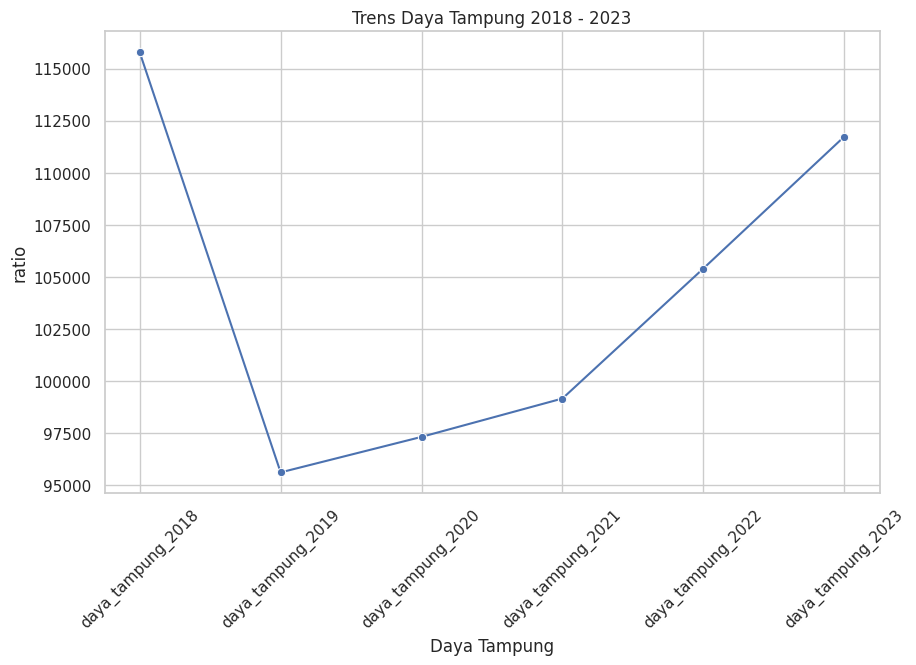

In [38]:
daya_t = df[[ 'daya_tampung_2018', 'daya_tampung_2019',
       'daya_tampung_2020', 'daya_tampung_2021', 'daya_tampung_2022','daya_tampung_2023']]
daya_t = daya_t.sum().rename('ratio').reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(daya_t, x='index', y='ratio', marker ='o')
plt.xticks(rotation=45)
plt.title('Trens Daya Tampung 2018 - 2023')
plt.xlabel('Daya Tampung')
plt.show()

* **dari tahun 2018 mengalami penurunan ke tahun 2019 , kemudian naik stabil lagi sampai tahun 2023**

# Trens Peminat
---
---

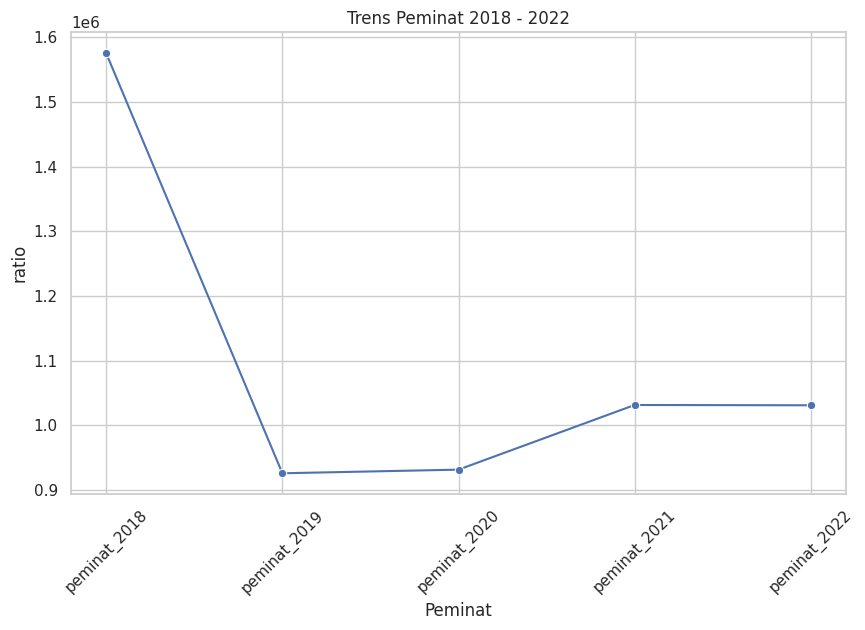

In [39]:
peminat_jurusan = df[[ 'peminat_2018', 'peminat_2019', 'peminat_2020', 'peminat_2021',
       'peminat_2022']]
peminat_jurusan = peminat_jurusan.sum().rename('ratio').reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(peminat_jurusan, x='index', y='ratio', marker='o')
plt.xticks(rotation=45)
plt.title('Trens Peminat 2018 - 2022')
plt.xlabel('Peminat')
plt.show()

* **Trens peminat pada tahun 2018 ke 2019 mengalami penurunan hingga tahun 2020 , kemudian naik lagi pada tahun 2021 dan stabil sampai tahun 2022**

# Statistika Dasar
---
---

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
kode_prodi,3058.0,421238.778613,223583.730967,111001.0,321013.25,362056.5,612014.75,921030.0
daya_tampung_2023,3058.0,36.536625,25.329225,4.0,20.00,30.0,45.00,269.0
peminat_2018,3058.0,515.116743,572.547427,0.0,112.25,335.0,702.50,4611.0
peminat_2019,3058.0,302.796926,339.767412,0.0,60.25,193.0,419.00,2847.0
peminat_2020,3058.0,304.634402,337.429654,0.0,65.00,199.0,417.00,3090.0
peminat_2021,3058.0,337.318836,397.216550,0.0,76.00,201.0,449.00,3833.0
peminat_2022,3058.0,337.170046,380.234364,1.0,79.00,211.0,453.75,3566.0
daya_tampung_2018,3058.0,37.859385,26.217514,5.0,23.00,30.0,45.00,252.0
daya_tampung_2019,3058.0,31.261609,21.559153,3.0,18.00,24.0,38.00,234.0
daya_tampung_2020,3058.0,31.819490,22.881887,3.0,18.00,24.0,39.00,255.0


In [21]:
df.describe(include='object')

,nama_univ,nama_prodi,jenjang
count,3058,3058,3058
unique,84,679,2
top,UNIVERSITAS PENDIDIKAN INDONESIA,MANAJEMEN,Sarjana
freq,76,65,3054


Universitas Pendidikan Indonesia Merupakan paling banyak peminat disini, dengn jurusan manajemen tingkat Sarjana

# Top 10 Universitas, Nama Prodi & Jenjang
---
---

In [22]:
top10 = df['nama_univ'].value_counts().rename('Peminat').reset_index()
top10=top10.head(10)

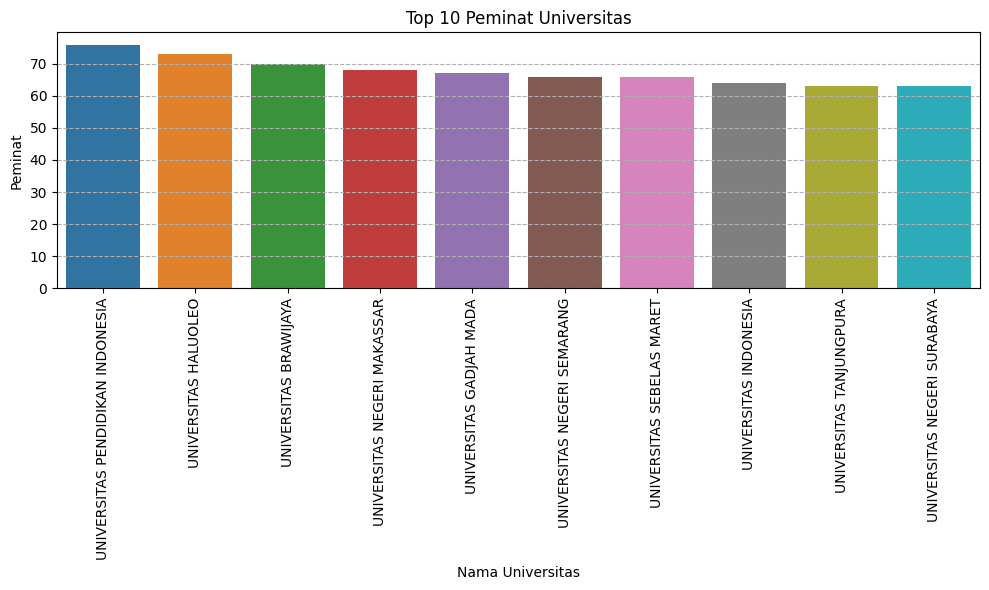

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='index', y='Peminat')
plt.xticks(rotation=90)
plt.title('Top 10 Peminat Universitas')
plt.xlabel('Nama Universitas')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

* **Peminat Universitas pendidikan Indonesia adalah yang menempati peringkat pertama dan disusul oleh Univ Haluoleo dan ke 3 Univ Brawijaya**

In [24]:
top10_prodi = df['nama_prodi'].value_counts().rename('Peminat').reset_index()
top10_prodi = top10_prodi.head(10)


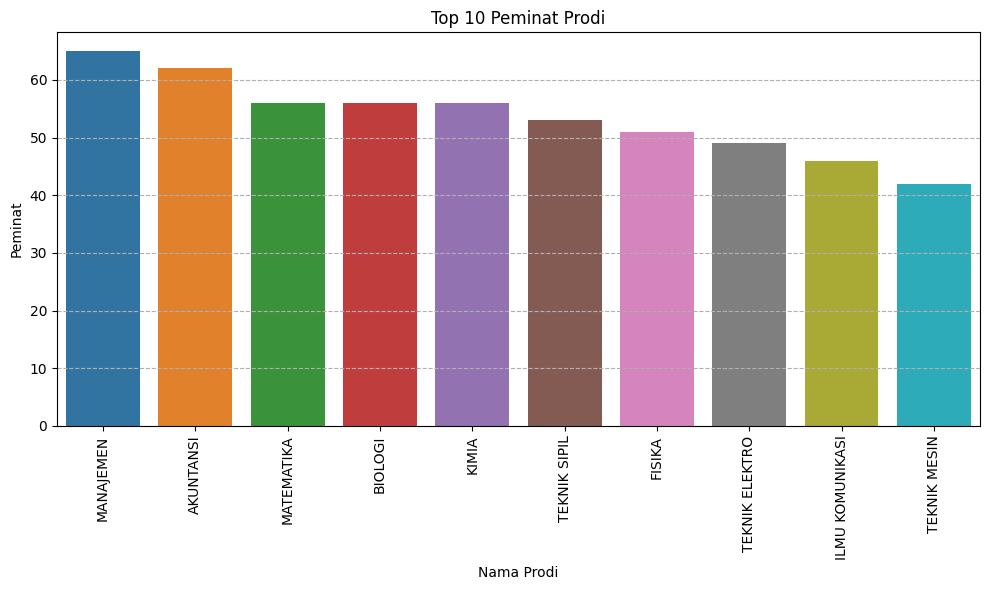

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=top10_prodi, x='index', y='Peminat')
plt.xticks(rotation=90)
plt.title('Top 10 Peminat Prodi')
plt.xlabel('Nama Prodi')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

* **Prodi Manajemen Merupan peringkat pertama dengan peminat dan disusul oleh Akuntansi kemudian Matematika**

In [26]:
jenjang = df['jenjang'].value_counts()

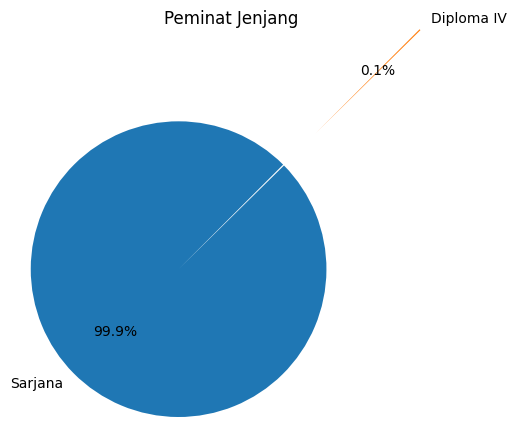

In [27]:
explodes =0.5,0.8
plt.pie(jenjang.values, labels=  jenjang.index, autopct='%1.1f%%', startangle =45, explode =explodes)
plt.title('Peminat Jenjang')
plt.show()


* **Berdasarkan pie plot Hampir semua peminat di jurusan Sarjana dengan perbandingan 10 : 1**

# Universitas dengan Nama Prodi dan Daya Tampung
---
---


In [28]:
from ipywidgets import interact

In [29]:
daya_tampung = df[['daya_tampung_2018', 'daya_tampung_2019',
       'daya_tampung_2020', 'daya_tampung_2021', 'daya_tampung_2022','daya_tampung_2023']]


In [30]:
@interact
def plot_data(nama_univ=df['nama_univ'].unique()):
    nama_univ1 = df[df['nama_univ'] == nama_univ]
    f, ax = plt.subplots(len(daya_tampung.columns), 1, figsize=(30, 35))

    for i, column in enumerate(daya_tampung.columns):
        sns.set(style='whitegrid')
        sns.barplot(data=nama_univ1, y=column, x='nama_prodi', ax=ax[i], palette='husl')
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].set_title(f'Nama Prodi dengan {column}')

    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='nama_univ', options=('UNIVERSITAS SYIAH KUALA', 'UNIVERSITAS MALIK…

# Universitas dengan Nama Prodi dan Peminat
---

---

In [31]:
peminat = df[['peminat_2018', 'peminat_2019', 'peminat_2020', 'peminat_2021',
       'peminat_2022']]

In [32]:
@interact
def plot_data(nama_univ=df['nama_univ'].unique()):
    nama_univ1 = df[df['nama_univ'] == nama_univ]
    f, ax = plt.subplots(len(peminat.columns), 1, figsize=(15, 30))

    for i, column in enumerate(peminat.columns):
        sns.set(style='whitegrid')
        sns.barplot(data=nama_univ1, y=column, x='nama_prodi', ax=ax[i], palette='husl')
        ax[i].tick_params(axis='x', rotation=90)
        ax[i].set_title(f'Nama Prodi dengan {column}')

    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='nama_univ', options=('UNIVERSITAS SYIAH KUALA', 'UNIVERSITAS MALIK…